<a href="https://colab.research.google.com/github/SanjayBhargavKudupudi/Clustering/blob/main/anomaly%20detection/pyOD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing PYOD

In [ ]:
!pip install pyod


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.1.2-py3-none-any.whl size=190289 sha256=68584dc05542cb736e236d4c02a4f37e0845d93c35f8aaa465ba3ca043728a61
  Stored in directory: /root/.cache/pip/wheels/81/1b/61/aa85b78c3c0c8871f4231e3f4a03bb23cecb7db829498380ee
Successfully built pyod


In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)


Preprocess Data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)


Applying an Anomaly Detection Model


Using the KNN model from PyOD:

In [ ]:
from pyod.models.knn import KNN

# Train the model
clf = KNN()
clf.fit(scaled_df)


KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

Identifiying Anomalies

In [ ]:
# Prediction labels (0: inliers, 1: outliers)
y_train_pred = clf.labels_

# Outlier scores
y_train_scores = clf.decision_scores_


Visualizing the results:

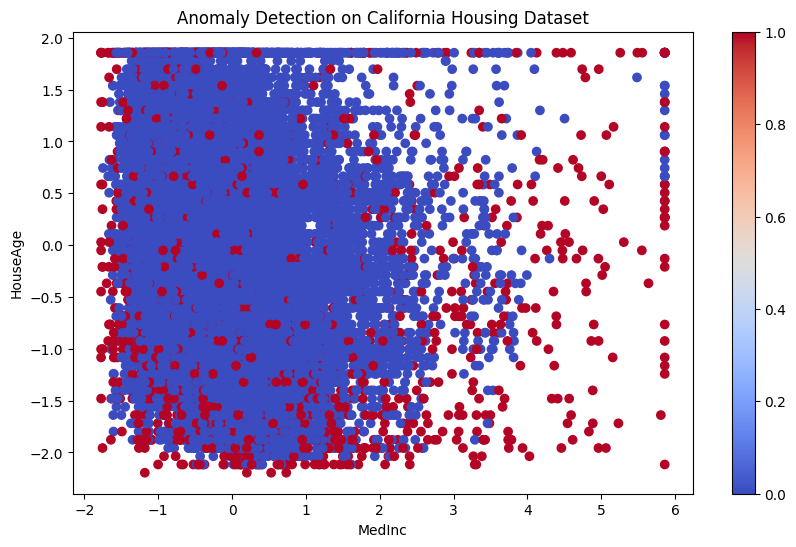

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(scaled_df[:, 0], scaled_df[:, 1], c=y_train_pred, cmap='coolwarm')
plt.title('Anomaly Detection on California Housing Dataset')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.colorbar()
plt.show()
